## 4-4. 뭉게뭉게 단어구름, Wordcloud

- wordcloud를 이용해서 텍스트 구름을 만들어봅시다.

### wordcloud 라이브러리

`wordcloud`는 파이썬의 텍스트 클라우드 라이브러리입니다. 이를 기반으로 텍스트 구름을 그릴 수 있습니다.
`konlpy`는 한국어 형태소 분석기 라이브러리로, 주어진 문장에서 명사 등을 뽑아 내는 데에 사용할 수 있습니다.

우선, 이들을 사용하기 위해서 `pip`를 사용해 다운로드를 받아봅시다.

> Tip: `%`를 이용해서 노트북(.ipynb) 환경에서 터미널 코드를 실행할 수 있습니다.

In [2]:
%pip install wordcloud
%pip install konlpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


설치를 다 진행했다면, 이제 `wordcloud` 라이브러리를 사용할 준비가 되었습니다.

### Wordcloud 만들기

WordCloud를 만드는 방법은 다음과 같습니다.

1. KoNLPy 라이브러리로 한국어 문장을 전처리
2. Counter를 이용해 빈도수 측정
3. WordCloud를 이용해 시각화

이 흐름대로 시각화를 진행해보도록 하겠습니다.

In [3]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [4]:
# 워드클라우드를 만드는 데 사용할 애국가 가사입니다.

national_anthem = """
동해물과 백두산이 마르고 닳도록
하느님이 보우하사 우리나라 만세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
남산 위에 저 소나무 철갑을 두른 듯
바람 서리 불변함은 우리 기상일세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
가을 하늘 공활한데 높고 구름 없이
밝은 달은 우리 가슴 일편단심일세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
이 기상과 이 맘으로 충성을 다하여
괴로우나 즐거우나 나라 사랑하세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
"""

형태소 분석기 객체를 사용해서 주어진 문자열에서 명사를 추출해봅시다.

In [5]:
# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.

hannanum = Hannanum()
nouns = hannanum.nouns(national_anthem)
words = [noun for noun in nouns if len(noun) > 1]

words[:10]

['동해물', '백두산', '하느님', '보우하사', '우리나라', '무궁화', '삼천리', '강산', '사람', '대한']

**Java가 설치되어있지 않은 경우, 실행 중 오류가 발생할 수 있습니다.**  
[이 링크](https://www.oracle.com/java/technologies/downloads/)에서 여러분의 환경에 맞는 Java를 설치하신 후, 이후 과정을 따라와주세요.

In [6]:
# counter를 이용해 각 단어의 개수를 세줍니다.

counter = Counter(nouns)
counter

Counter({'동해물': 1,
         '백두산': 1,
         '하느님': 1,
         '보우하사': 1,
         '우리나라': 1,
         '무궁화': 4,
         '삼천리': 4,
         '화': 4,
         '강산': 4,
         '사람': 4,
         '대한': 4,
         '길': 4,
         '보전하세': 4,
         '남산': 1,
         '위': 1,
         '소나무': 1,
         '철갑': 1,
         '듯': 1,
         '불변': 1,
         '우리': 2,
         '기상일세': 1,
         '하늘': 1,
         '공활한데': 1,
         '구름': 1,
         '달': 1,
         '가슴': 1,
         '일편단심일세': 1,
         '기상': 1,
         '충성': 1,
         '사랑하세': 1})

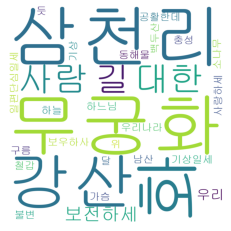

In [16]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

plt.rcParams['font.family'] = 'Malgun Gothic'

wordcloud = WordCloud(font_path='C:/Windows/Fonts/gulim',
                      background_color='white',
                      width=1000,
                      height=1000
                     )


img = wordcloud.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(img)

간단한 사용법을 확인했으니, 이제 이를 활용해서 스크래핑과 함께 사용해봅시다!